<a href="https://colab.research.google.com/github/swat90/OIBSIP/blob/main/unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unemployment in India**

Task objective : Analysis of effect of COVID-19 on employment rate in India

Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load the datasets
#Jan 2019 to June 2020
unemp = pd.read_csv(r"/content/drive/MyDrive/OASIS/Unemployment in India.csv")

#Jan 2020 to October 2020
unemp2020 = pd.read_csv(r"/content/drive/MyDrive/OASIS/Unemployment_Rate_upto_11_2020.csv")
unemp2020.head(10)


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.74
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.74
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.74
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.74
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.74


In [ ]:
#Information about the dataset
unemp.info()
#7 colums, 768 entries, 3 columns are float datatypes, four are object datatype

#There are extra spaces in columns names which should be removed
unemp.columns = unemp.columns.str.strip()
unemp.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
#Information about the 2020 dataset
unemp2020.info()
#9 colums, 267 entries, 4 columns are float datatypes, one integer and four are object datatype

#There are extra spaces in columns names which should be removed
unemp2020.columns = unemp2020.columns.str.strip()
unemp2020.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

Change the datatype of date column

In [ ]:
unemp['Date'] = pd.to_datetime(unemp['Date'])
unemp.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,2019-10-31,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,2019-11-30,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,2019-12-31,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,2020-01-31,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,2020-02-29,Monthly,5.91,11723617.0,42.83,Rural


In [ ]:
#Perform for 2020 dataset
unemp2020['Date'] = pd.to_datetime(unemp2020['Date'])
unemp2020.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,2020-06-30,M,3.31,19805400,47.41,South,15.9129,79.74
6,Andhra Pradesh,2020-07-31,M,8.34,15431615,38.91,South,15.9129,79.74
7,Andhra Pradesh,2020-08-31,M,6.96,15251776,37.83,South,15.9129,79.74
8,Andhra Pradesh,2020-09-30,M,6.40,15220312,37.47,South,15.9129,79.74
9,Andhra Pradesh,2020-10-31,M,6.59,15157557,37.34,South,15.9129,79.74


Data pre processing steps

In [ ]:
#check for duplicates
dupli = unemp.duplicated().sum()
dupli1 = unemp2020.duplicated().sum()
print(dupli, dupli1)
#There seems to be some rows which has null entries for unemp dataset
unemp = unemp.drop_duplicates() #741 remaining
#no duplicates for unemp2020 dataset

27 0


In [ ]:
#check for missing values
print(unemp.isnull().sum())
print(unemp2020.isnull().sum())
#1 row is still remaining with the null entry in unemp dataset as all others have been removed using drop duplicates
unemp.dropna(inplace=True)
unemp.info() #740 entries remaining

Region                                     1
Date                                       1
Frequency                                  1
Estimated Unemployment Rate (%)            1
Estimated Employed                         1
Estimated Labour Participation Rate (%)    1
Area                                       1
dtype: int64
Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----      

In [ ]:
#Frequency is only monthly in both the datasets dataset, we can remove this column
unemp.drop("Frequency", axis=1, inplace=True)
unemp2020.drop("Frequency", axis=1, inplace=True)

In [ ]:
# Merge DataFrames based on 'Region' using a left merge
merged_df = pd.merge(unemp, unemp2020[['Region', 'Region.1', 'latitude', 'longitude']],
                     on='Region', how='left')

# Drop duplicates from the result (if any)
merged_df.drop_duplicates(keep='first', inplace=True)

# Reset the index of the merged DataFrame
merged_df.reset_index(drop=True, inplace=True)

In [ ]:
print(merged_df)

             Region       Date  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh 2019-05-31                             3.65   
1    Andhra Pradesh 2019-06-30                             3.05   
2    Andhra Pradesh 2019-07-31                             3.75   
3    Andhra Pradesh 2019-08-31                             3.32   
4    Andhra Pradesh 2019-09-30                             5.17   
..              ...        ...                              ...   
735     West Bengal 2020-02-29                             7.55   
736     West Bengal 2020-03-31                             6.67   
737     West Bengal 2020-04-30                            15.63   
738     West Bengal 2020-05-31                            15.22   
739     West Bengal 2020-06-30                             9.86   

     Estimated Employed  Estimated Labour Participation Rate (%)   Area  \
0            11999139.0                                    43.24  Rural   
1            11755881.0                      

(740, 9)

We Split our Dataset into two parts one of them before the lockdown[2019-5 to 2020-3] And the Second One during Lockdown[2020-4 to 2020-10].

In [ ]:
mask = (merged_df['Date'] >= '2019-05-31') & (merged_df['Date'] <= '2020-03-31')
unemp_b = merged_df.loc[mask]
print(unemp_b) #588 rows, 9 columns

             Region       Date  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh 2019-05-31                             3.65   
1    Andhra Pradesh 2019-06-30                             3.05   
2    Andhra Pradesh 2019-07-31                             3.75   
3    Andhra Pradesh 2019-08-31                             3.32   
4    Andhra Pradesh 2019-09-30                             5.17   
..              ...        ...                              ...   
732     West Bengal 2019-11-30                             6.61   
733     West Bengal 2019-12-31                             7.24   
734     West Bengal 2020-01-31                             7.27   
735     West Bengal 2020-02-29                             7.55   
736     West Bengal 2020-03-31                             6.67   

     Estimated Employed  Estimated Labour Participation Rate (%)   Area  \
0            11999139.0                                    43.24  Rural   
1            11755881.0                      

In [ ]:
#For second dataset
mask1 = (unemp2020['Date'] >= '2020-04-30')
unemp_a = unemp2020.loc[mask1]
print(unemp_a) #188 rows, 8 columns

             Region       Date  Estimated Unemployment Rate (%)  \
3    Andhra Pradesh 2020-04-30                            20.51   
4    Andhra Pradesh 2020-05-31                            17.43   
5    Andhra Pradesh 2020-06-30                             3.31   
6    Andhra Pradesh 2020-07-31                             8.34   
7    Andhra Pradesh 2020-08-31                             6.96   
..              ...        ...                              ...   
262     West Bengal 2020-06-30                             7.29   
263     West Bengal 2020-07-31                             6.83   
264     West Bengal 2020-08-31                            14.87   
265     West Bengal 2020-09-30                             9.35   
266     West Bengal 2020-10-31                             9.98   

     Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
3              11336911                                    33.10    South   
4              12988845                  

First and second moment business decision

In [ ]:
before_stats = unemp_b.iloc[:,:6].describe()
after_stats = unemp_a.iloc[:,:6].describe()
print("Before COVID", before_stats, "\nAfter COVID", after_stats)

Before COVID        Estimated Unemployment Rate (%)  Estimated Employed  \
count                       588.000000        5.880000e+02   
mean                          9.614864        7.470499e+06   
std                           7.372715        8.276125e+06   
min                           0.000000        8.618600e+04   
25%                           4.332500        1.190404e+06   
50%                           7.225000        5.064048e+06   
75%                          13.300000        1.164705e+07   
max                          34.690000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               588.000000  
mean                                 43.815187  
std                                   7.679054  
min                                  26.330000  
25%                                  39.047500  
50%                                  42.330000  
75%                                  45.897500  
max                                 

From comparing the statistics of above two datasets, it can be clearly seen,

Minimum of estimated Unemployment rate rises from 0 to 0.5 during COVID and maxium raise from 34.69 to 75.85 which brings a huge effect on daily lives.
Estimated Labour Participation Rate also see a decline in minimum, maximum and mean values.

In [ ]:
region_b = unemp_b.groupby(['Region.1'])[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']].mean().reset_index()
region_b = round(region_b,2) #round to 2 digits
print(region_b)

region_a = unemp_a.groupby(['Region.1'])[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']].mean().reset_index()
region_a = round(region_a,2) #round to 2 digits
print(region_a)

    Region.1  Estimated Unemployment Rate (%)  Estimated Employed  \
0       East                             9.63         10744744.75   
1      North                            14.27          6963883.30   
2  Northeast                            12.29          1950860.52   
3      South                             4.19          7744877.73   
4       West                             6.25          9910605.37   

   Estimated Labour Participation Rate (%)  
0                                    42.09  
1                                    41.26  
2                                    55.26  
3                                    42.60  
4                                    43.00  
    Region.1  Estimated Unemployment Rate (%)  Estimated Employed  \
0       East                            16.17         18801824.50   
1      North                            16.23         12817156.05   
2  Northeast                            10.03          3342133.89   
3      South                           

Visualize the COVID effect on separate regions

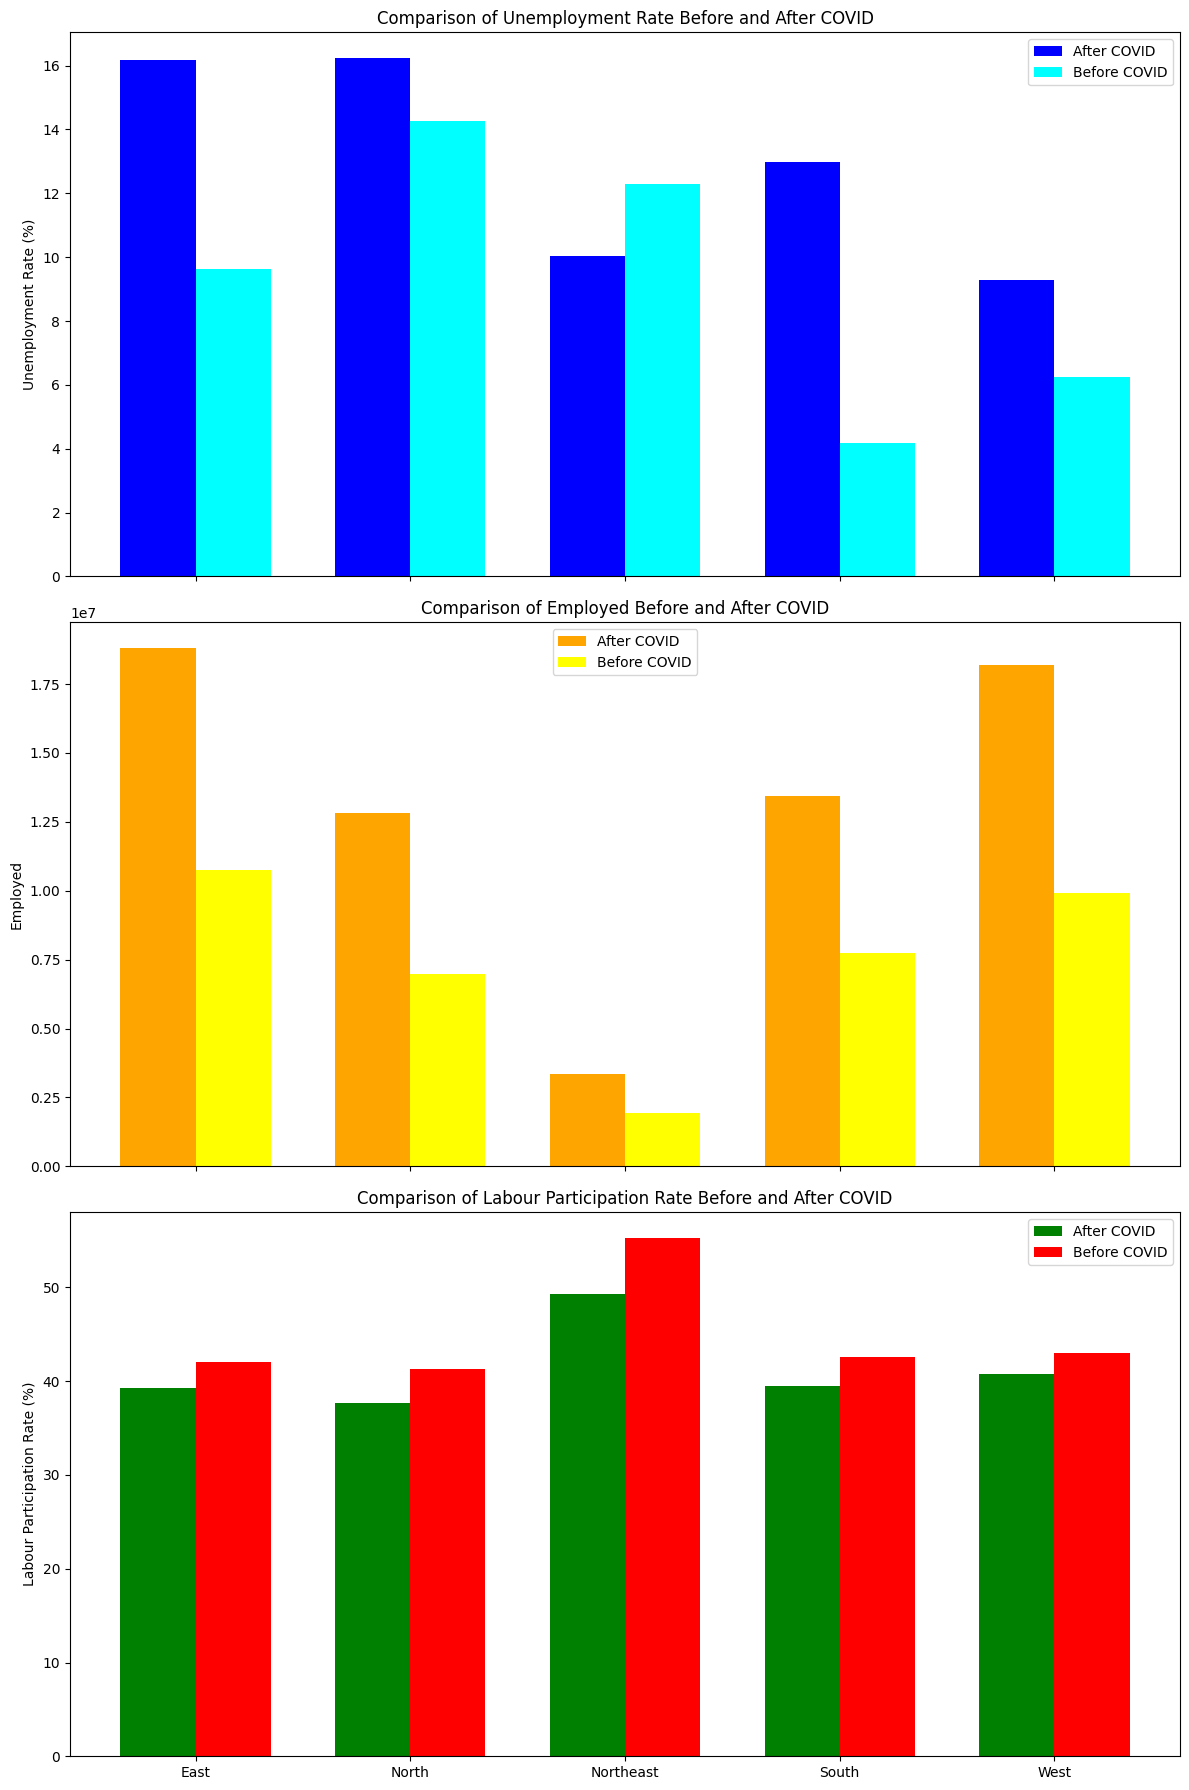

In [ ]:
# Set up three subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Bar width
bar_width = 0.35
bar_positions_a = np.arange(len(region_a['Region.1']))
bar_positions_b = bar_positions_a + bar_width

# Plot for Estimated Unemployment Rate
axs[0].bar(bar_positions_a, region_a['Estimated Unemployment Rate (%)'], width=bar_width, label='After COVID', color='blue')
axs[0].bar(bar_positions_b, region_b['Estimated Unemployment Rate (%)'], width=bar_width, label='Before COVID', color='cyan')
axs[0].set_ylabel('Unemployment Rate (%)')
axs[0].set_title('Comparison of Unemployment Rate Before and After COVID')
axs[0].legend()

# Plot for Estimated Employed
axs[1].bar(bar_positions_a, region_a['Estimated Employed'], width=bar_width, label='After COVID', color='orange')
axs[1].bar(bar_positions_b, region_b['Estimated Employed'], width=bar_width, label='Before COVID', color='yellow')
axs[1].set_ylabel('Employed')
axs[1].set_title('Comparison of Employed Before and After COVID')
axs[1].legend()

# Plot for Estimated Labour Participation Rate
axs[2].bar(bar_positions_a, region_a['Estimated Labour Participation Rate (%)'], width=bar_width, label='After COVID', color='green')
axs[2].bar(bar_positions_b, region_b['Estimated Labour Participation Rate (%)'], width=bar_width, label='Before COVID', color='red')
axs[2].set_ylabel('Labour Participation Rate (%)')
axs[2].set_title('Comparison of Labour Participation Rate Before and After COVID')
axs[2].legend()

# Set x-axis labels for each subplot
axs[2].set_xticks(bar_positions_a + bar_width / 2)
axs[2].set_xticklabels(region_a['Region.1'])  # Set x-axis labels for the third subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

conclusions for separate regions,


1. Estimated Unemployment Rate (%) decreased in northeast after COVID.
2. Estimated Unemployment Rate (%) in south region was least among all but after covid, there is huge increase in this rate. There is also significant effect after COVID in east region.
3. Estimated Labour Participation Rate (%) decreased in every region after COVID.



In [ ]:
for region in regions_to_plot:
    region_data = unemp2020[unemp2020['Region.1'] == region]
    print(f"Region: {region}, Data Count: {len(region_data)}")


Region: East, Data Count: 40
Region: North, Data Count: 79
Region: Northeast, Data Count: 38
Region: South, Data Count: 60
Region: West, Data Count: 50


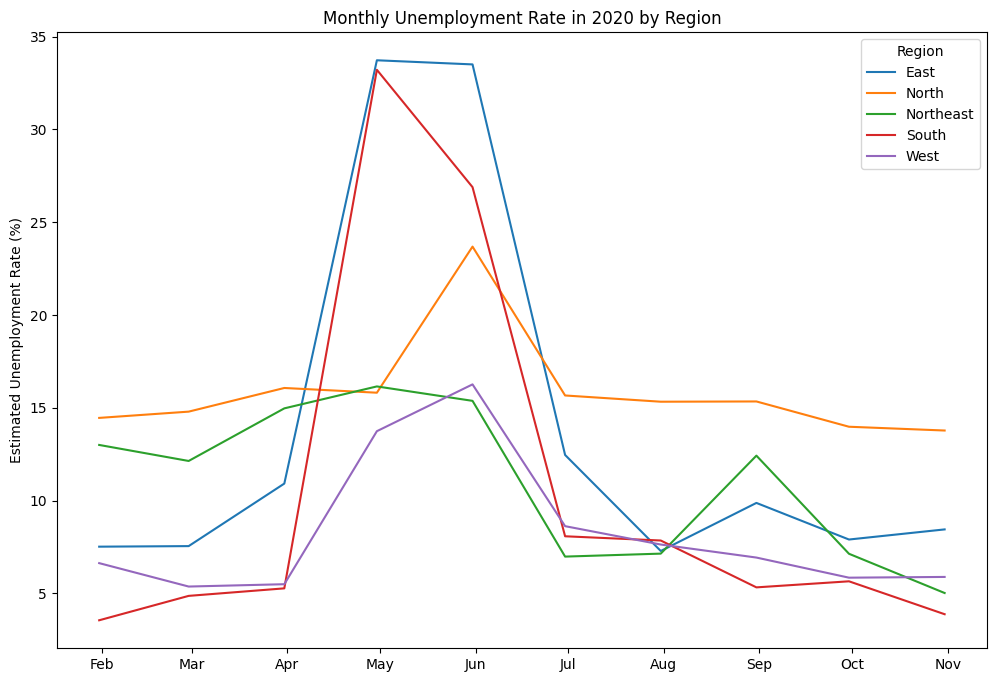

In [ ]:
from matplotlib.dates import MonthLocator, DateFormatter

# Group by 'Date' and 'Region.1' and calculate the mean
grouped_data = unemp2020.groupby(['Date', 'Region.1'])['Estimated Unemployment Rate (%)'].mean().reset_index()

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot lines for each region
for region in ['East', 'North', 'Northeast', 'South', 'West']:
    region_data = grouped_data[grouped_data['Region.1'] == region]
    ax.plot(region_data['Date'], region_data['Estimated Unemployment Rate (%)'], label=region)

# Set labels and title
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))

ax.set_ylabel('Estimated Unemployment Rate (%)')
ax.set_title('Monthly Unemployment Rate in 2020 by Region')
ax.legend(title='Region')

# Show the plot
plt.show()



1. For east, south and west, the unemployment rate shows a sudden rise in May and has peak from May to June. From June to July, it started decreasing. But the most affected regions were south and west.
2. For north region, there is increase in unemployment rate from May to June and then derease from June to July.
3. As discussed before, in northeast region, there is actually decrease in employment rate after COVID.



Plot for individual Regions (States)

In [ ]:
import plotly.express as px

# Assuming unemp_a and unemp_b are the original DataFrames

# Calculate average unemployment rates for each region before and after COVID
avg_unemployment_before_COVID = unemp_b.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()
avg_unemployment_after_COVID = unemp_a.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Merge the DataFrames on 'Region'
combined_df = pd.merge(avg_unemployment_before_COVID, avg_unemployment_after_COVID, on='Region')

# Reshape the DataFrame to long format
combined_df_long = pd.melt(
    combined_df,
    id_vars=['Region'],
    value_vars=['Estimated Unemployment Rate (%)_x', 'Estimated Unemployment Rate (%)_y'],
    var_name='Period',
    value_name='Unemployment Rate (%)'
)

# Map period names to custom labels
period_labels = {
    'Estimated Unemployment Rate (%)_x': 'Before COVID',
    'Estimated Unemployment Rate (%)_y': 'After COVID'
}

# Update legend labels in the plot
fig = px.bar(
    combined_df_long,
    x='Region',
    y='Unemployment Rate (%)',
    color='Period',
    barmode='group',
    labels={'Unemployment Rate (%)': 'Unemployment Rate (%)'},
    title='Average Estimated Unemployment Rate by Region',
    category_orders={'Period': ['Before COVID', 'After COVID']},
)

# Customize legend labels
fig.for_each_trace(lambda t: t.update(name=period_labels[t.name]))

fig.update_layout(
    xaxis_title='Region',
    yaxis_title='Unemployment Rate (%)',
    template='plotly_white'
)

fig.show()

In Assam, Chattisgarh, Himachal Pradesh, Jammu & Kashmir, Tripura and Uttar Pradesh, Unemployment rate shows a decline after COIVD.
The most negatively affected region is Puducherry.


In [ ]:
#TOP 10 worst affected states
# Rename columns to 'Before COVID' and 'After COVID'
combined_df = combined_df.rename(columns={
    'Estimated Unemployment Rate (%)_x': 'Before COVID',
    'Estimated Unemployment Rate (%)_y': 'After COVID'
})

# Calculate the absolute difference between before and after COVID
combined_df['Difference'] = combined_df['After COVID'] - combined_df['Before COVID']

# Get the top 10 regions with the most difference
top_10_regions = combined_df.nlargest(10, 'Difference')

# Set the index to 'Region'
top_10_regions = top_10_regions.set_index('Region')

# Display the top 10 regions
print(top_10_regions)

                Before COVID  After COVID  Difference
Region                                               
Puducherry          1.581364    25.125714   23.544351
Tamil Nadu          3.161364    15.972857   12.811494
Jharkhand          13.954545    23.528571    9.574026
Bihar              13.990000    22.625714    8.635714
Goa                 8.329048    14.960000    6.630952
Karnataka           3.272727     9.535714    6.262987
Haryana            23.171364    29.087143    5.915779
Uttarakhand         5.913333    11.604286    5.690952
West Bengal         6.595000    11.877143    5.282143
Andhra Pradesh      5.213182     9.934286    4.721104


Geographical plot showing difference in unemployment rate before and after COVID

In [ ]:
# Merge combined_df with unemp_a or unemp_b to get latitude and longitude
combined_df = pd.merge(combined_df, unemp_a[['Region', 'latitude', 'longitude']], on='Region', how='left')

# Take the absolute values of the 'Difference' column
combined_df['Absolute Difference'] = combined_df['Difference'].abs()

# Plot a geographical scatter plot for all regions
fig = px.scatter_geo(
    combined_df,
    lon='latitude',
    lat='longitude',
    size='Absolute Difference',
    color='Difference',
    hover_name='Region',
    size_max=50,
    projection='natural earth',
    title='Regions with Difference in Estimated Unemployment Rate (Before and After COVID)'
)

fig.update_geos(lataxis_range=[5, 40], lonaxis_range=[65, 100], oceancolor="#3399FF", showocean=True)

fig.update_layout(width=1000, height=800)

fig.show()

Now, let's follow the same for labor participation rate column

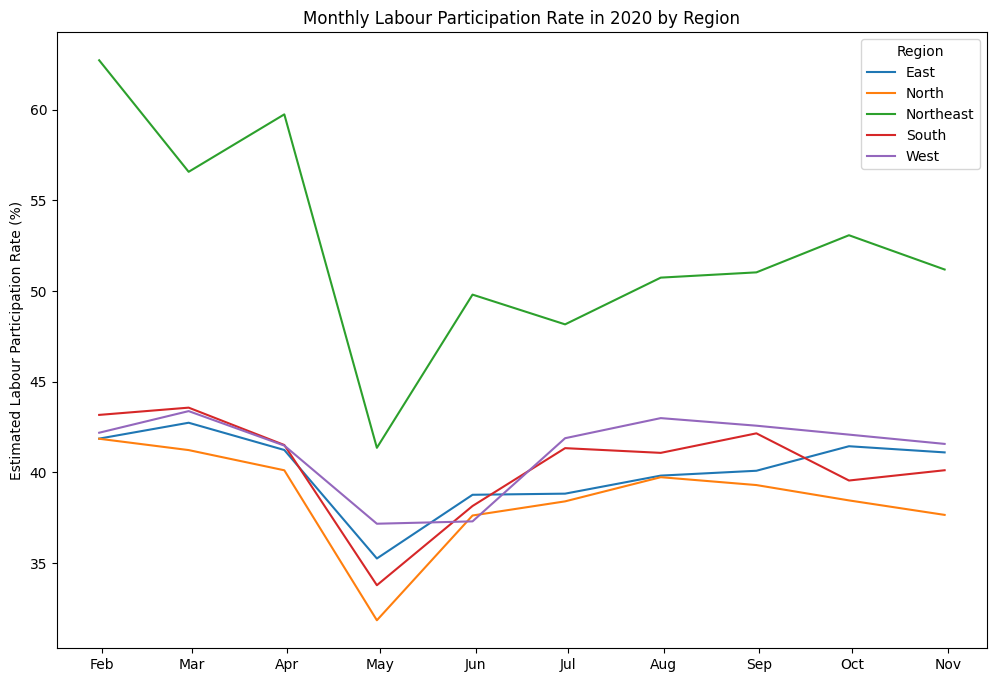

In [ ]:
from matplotlib.dates import MonthLocator, DateFormatter

# Group by 'Date' and 'Region.1' and calculate the mean
grouped_data = unemp2020.groupby(['Date', 'Region.1'])['Estimated Labour Participation Rate (%)'].mean().reset_index()

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot lines for each region
for region in ['East', 'North', 'Northeast', 'South', 'West']:
    region_data = grouped_data[grouped_data['Region.1'] == region]
    ax.plot(region_data['Date'], region_data['Estimated Labour Participation Rate (%)'], label=region)

# Set labels and title
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))

ax.set_ylabel('Estimated Labour Participation Rate (%)')
ax.set_title('Monthly Labour Participation Rate in 2020 by Region')
ax.legend(title='Region')

# Show the plot
plt.show()

Labour Participation Rate shows a clear dip in May

In [ ]:
import plotly.express as px

# Assuming unemp_a and unemp_b are the original DataFrames

# Calculate average unemployment rates for each region before and after COVID
avg_Labour_Participation_before_COVID = unemp_b.groupby('Region')['Estimated Labour Participation Rate (%)'].mean().reset_index()
avg_Labour_Participation_after_COVID = unemp_a.groupby('Region')['Estimated Labour Participation Rate (%)'].mean().reset_index()

# Merge the DataFrames on 'Region'
combined_df1 = pd.merge(avg_Labour_Participation_before_COVID, avg_Labour_Participation_after_COVID, on='Region')

# Reshape the DataFrame to long format
combined_df_long = pd.melt(
    combined_df1,
    id_vars=['Region'],
    value_vars=['Estimated Labour Participation Rate (%)_x', 'Estimated Labour Participation Rate (%)_y'],
    var_name='Period',
    value_name='Labour Participation Rate (%)'
)

# Map period names to custom labels
period_labels = {
    'Estimated Labour Participation Rate (%)_x': 'Before COVID',
    'Estimated Labour Participation Rate (%)_y': 'After COVID'
}

# Update legend labels in the plot
fig = px.bar(
    combined_df_long,
    x='Region',
    y='Labour Participation Rate (%)',
    color='Period',
    barmode='group',
    labels={'Labour Participation Rate (%)': 'Labour Participation Rate (%)'},
    title='Average Estimated Labour Participation Rate by Region',
    category_orders={'Period': ['Before COVID', 'After COVID']},
)

# Customize legend labels
fig.for_each_trace(lambda t: t.update(name=period_labels[t.name]))

fig.update_layout(
    xaxis_title='Region',
    yaxis_title='Labour Participation Rate (%)',
    template='plotly_white'
)

fig.show()

The Labour Participation rate actually increased a little bit in Goa, Karnatka and Uttarakhand.
The worst hit states are Delhi, Tamil Nadu and Tripura

In [ ]:
# TOP 10 worst affected states
# Rename columns to 'Before COVID' and 'After COVID'
combined_df1 = combined_df1.rename(columns={
    'Estimated Labour Participation Rate (%)_x': 'Before COVID',
    'Estimated Labour Participation Rate (%)_y': 'After COVID'
})

# Calculate the absolute difference between before and after COVID
combined_df1['Difference'] = combined_df1['Before COVID'] - combined_df1['After COVID']

# Get the top 10 regions with the most difference
top_10_regions = combined_df1.nlargest(10, 'Difference')

# Set the index to 'Region'
top_10_regions = top_10_regions.set_index('Region')

# Display the top 10 regions
print(top_10_regions)

                  Before COVID  After COVID  Difference
Region                                                 
Tripura              64.530455    53.308571   11.221883
Delhi                41.352727    32.030000    9.322727
Tamil Nadu           44.079091    34.965714    9.113377
Himachal Pradesh     46.697273    38.954286    7.742987
Chhattisgarh         45.060909    39.622857    5.438052
Jammu & Kashmir      41.940000    36.916667    5.023333
Sikkim               48.635833    43.637143    4.998690
Puducherry           39.568182    35.204286    4.363896
Punjab               42.773182    38.651429    4.121753
Kerala               36.509091    32.427143    4.081948


In [ ]:
unemp_a.rename(columns={'latitude': 'longitude', 'longitude': 'latitude'}, inplace=True)
# Merge combined_df with unemp_a or unemp_b to get latitude and longitude
combined_df1 = pd.merge(combined_df1, unemp_a[['Region', 'latitude', 'longitude']], on='Region', how='left')

# Take the absolute values of the 'Difference' column
combined_df1['Absolute Difference'] = combined_df1['Difference'].abs()

# Plot a geographical scatter plot for all regions
fig = px.scatter_geo(
    combined_df1,
    lon='longitude',
    lat='latitude',
    size='Absolute Difference',
    color='Difference',
    hover_name='Region',
    size_max=50,
    projection='natural earth',
    title='Regions with Difference in Labour Participation Rate (Before and After COVID)'
)

fig.update_geos(lataxis_range=[5, 40], lonaxis_range=[65, 100], oceancolor="#3399FF", showocean=True)

fig.update_layout(width=1000, height=800)

fig.show()

Let's see the effect of COVID on rural and urban areas with the little amount of data we have.

In [ ]:
mask2 = (merged_df['Date'] >= '2020-04-30')
unemp_a_ru = merged_df.loc[mask2]
print(unemp_a_ru) #152 rows, 9 columns

             Region       Date  Estimated Unemployment Rate (%)  \
11   Andhra Pradesh 2020-04-30                            16.29   
12   Andhra Pradesh 2020-05-31                            14.46   
13   Andhra Pradesh 2020-06-30                             0.85   
24            Assam 2020-05-31                             9.38   
25            Assam 2020-06-30                             0.00   
..              ...        ...                              ...   
724     Uttarakhand 2020-05-31                            17.36   
725     Uttarakhand 2020-06-30                             5.08   
737     West Bengal 2020-04-30                            15.63   
738     West Bengal 2020-05-31                            15.22   
739     West Bengal 2020-06-30                             9.86   

     Estimated Employed  Estimated Labour Participation Rate (%)   Area  \
11            8792827.0                                    36.03  Rural   
12            9526902.0                      

In [ ]:
# Filter data for "Urban" and "Rural" areas separately
urban_unemp_b = unemp_b[unemp_b['Area'] == 'Urban']
rural_unemp_b = unemp_b[unemp_b['Area'] == 'Rural']

urban_unemp_a_ru = unemp_a_ru[unemp_a_ru['Area'] == 'Urban']
rural_unemp_a_ru = unemp_a_ru[unemp_a_ru['Area'] == 'Rural']

# Calculate mean unemployment rates for each area in both datasets
mean_urban_unemp_b = urban_unemp_b['Estimated Unemployment Rate (%)'].mean()
mean_rural_unemp_b = rural_unemp_b['Estimated Unemployment Rate (%)'].mean()

mean_urban_unemp_a_ru = urban_unemp_a_ru['Estimated Unemployment Rate (%)'].mean()
mean_rural_unemp_a_ru = rural_unemp_a_ru['Estimated Unemployment Rate (%)'].mean()

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Dataset': ['Before COVID', 'After COVID'],
    'Mean Urban Unemployment Rate': [mean_urban_unemp_b, mean_urban_unemp_a_ru],
    'Mean Rural Unemployment Rate': [mean_rural_unemp_b, mean_rural_unemp_a_ru]
})

# Melt the DataFrame for plotting
melted_df = pd.melt(comparison_df, id_vars='Dataset', var_name='Area', value_name='Mean Unemployment Rate (%)')

# Create a bar plot using Plotly Express
fig = px.bar(
    melted_df,
    x='Dataset',
    y='Mean Unemployment Rate (%)',
    color='Area',
    barmode='group',
    title='Mean Urban and Rural Unemployment Rates Before and After COVID'
)

# Show the plot
fig.show()

In [ ]:
# Calculate mean unemployment rates for each area in both datasets
mean_urban_Labour_b = urban_unemp_b['Estimated Labour Participation Rate (%)'].mean()
mean_rural_Labour_b = rural_unemp_b['Estimated Labour Participation Rate (%)'].mean()

mean_urban_Labour_a_ru = urban_unemp_a_ru['Estimated Labour Participation Rate (%)'].mean()
mean_rural_Labour_a_ru = rural_unemp_a_ru['Estimated Labour Participation Rate (%)'].mean()

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Dataset': ['Before COVID', 'After COVID'],
    'Mean Urban Labour Participation Rate': [mean_urban_Labour_b, mean_urban_Labour_a_ru],
    'Mean Rural Labour Participation Rate': [mean_rural_Labour_b, mean_rural_Labour_a_ru]
})

# Melt the DataFrame for plotting
melted_df = pd.melt(comparison_df, id_vars='Dataset', var_name='Area', value_name='Mean Labour Participation Rate (%)')

# Create a bar plot using Plotly Express
fig = px.bar(
    melted_df,
    x='Dataset',
    y='Mean Labour Participation Rate (%)',
    color='Area',
    barmode='group',
    title='Mean Urban and Rural Labour Participation Rates Before and After COVID'
)

# Show the plot
fig.show()

Both Unmployment Rate and Labour Participation Rate exhibit a little bit more negative effect in urban areas than rural areas.

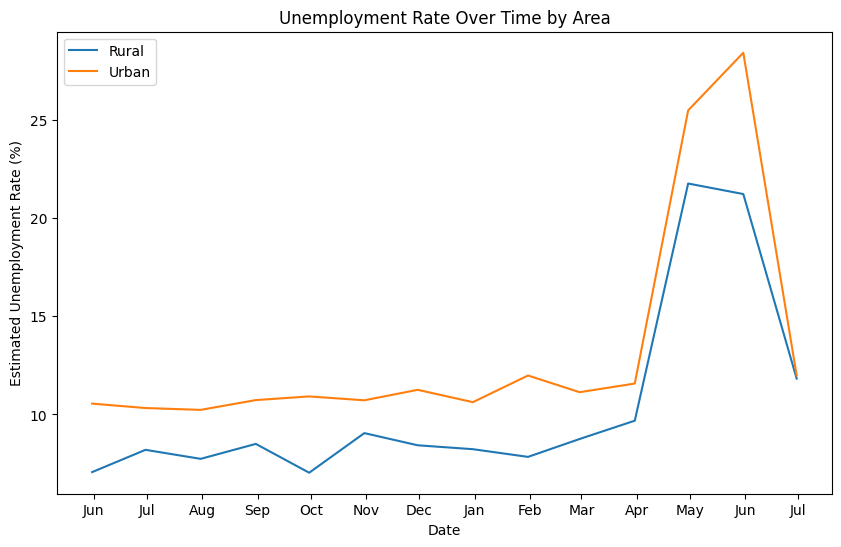

In [ ]:
#  Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Group by 'Area' and 'Date' and calculate the mean
grouped_data = unemp.groupby(['Area', 'Date'])['Estimated Unemployment Rate (%)'].mean().reset_index()

for area, data in grouped_data.groupby('Area'):
    ax.plot(data['Date'], data['Estimated Unemployment Rate (%)'], label=area)

# Set labels and title
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))

ax.set_xlabel('Date')
ax.set_ylabel('Estimated Unemployment Rate (%)')
ax.set_title('Unemployment Rate Over Time by Area')
ax.legend()

# Show the plot
plt.show()

# Show the plot
plt.show()




1.  The unemployment rate is more in urban areas than rural areas.
2.  The unemployment rate increased significantly in the months of May and June during peak of COVID and then declined in July.



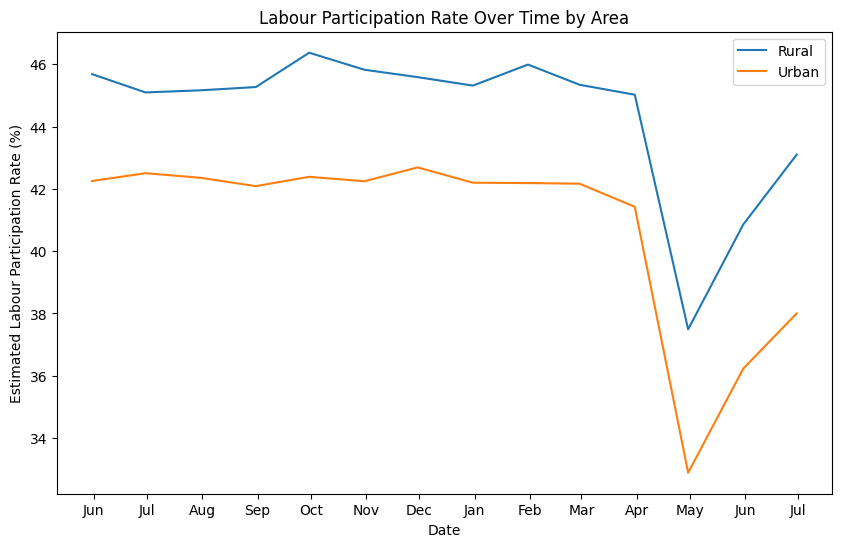

In [ ]:
#  Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Group by 'Area' and 'Date' and calculate the mean
grouped_data = unemp.groupby(['Area', 'Date'])['Estimated Labour Participation Rate (%)'].mean().reset_index()

for area, data in grouped_data.groupby('Area'):
    ax.plot(data['Date'], data['Estimated Labour Participation Rate (%)'], label=area)

# Set labels and title
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))

ax.set_xlabel('Date')
ax.set_ylabel('Estimated Labour Participation Rate (%)')
ax.set_title('Labour Participation Rate Over Time by Area')
ax.legend()

# Show the plot
plt.show()

# Show the plot
plt.show()


1.  The labour participation rate is more in rural areas than urban areas.
2.  The labour participation rate shows a sharp dip in the month of May for both urban and rural areas.

